In [1]:
!pip install scikit-learn>=0.24
!pip install ktrain 
!pip install Unidecode
!pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git

  Cloning https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to /tmp/pip-req-build-84b6rj8i
  Running command git clone -q https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git /tmp/pip-req-build-84b6rj8i


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from google.colab import drive
import re
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
print("Tensorflow Version",tf.__version__)
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import string
import re
from unidecode import unidecode
from textblob import TextBlob
import spacy
import nltk
from nltk import word_tokenize
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
from datetime import datetime
import string

# initialisation
nltk.download('stopwords')  # mots les plus fréquents
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Tensorflow Version 2.6.0
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/datagram/data/train_datam.csv')
df

,Unnamed: 0,category_id,pname
0,0,403,"Double concentré de tomates MUTTI, tube de 130g"
1,1,837,Pur jus de pommes pressées Pure Prémium TROPIC...
2,2,485,Rillettes de poulet rôti en cocotte
3,3,363,My Eyes - Taille-crayons 3 diamètres
4,4,591,Brosse à dents Inter Espaces médium AQUAFRESH
...,...,...,...
161875,162161,372,"Lait pour le corps bio à l'aloé véra SO BIO, 4..."
161876,162162,510,"Hacao aux crevettes + 2 sauces soja, 200g"
161877,162163,587,"Studio Line - Indestuctible 9, gel fixation ex..."
161878,162164,411,BISCUITS POIREAU 100G


In [5]:
del df['Unnamed: 0']
df.columns = ['category_id', 'pname']
df.head()

,category_id,pname
0,403,"Double concentré de tomates MUTTI, tube de 130g"
1,837,Pur jus de pommes pressées Pure Prémium TROPIC...
2,485,Rillettes de poulet rôti en cocotte
3,363,My Eyes - Taille-crayons 3 diamètres
4,591,Brosse à dents Inter Espaces médium AQUAFRESH


In [6]:
abbreviations = {
    "$": " dollar ",
    "€": " euro ",
    "4ao": "for adults only",
    "a.m": "before midday",
    "a3": "anytime anywhere anyplace",
    "aamof": "as a matter of fact",
    "acct": "account",
    "adih": "another day in hell",
    "afaic": "as far as i am concerned",
    "afaict": "as far as i can tell",
    "afaik": "as far as i know",
    "afair": "as far as i remember",
    "afk": "away from keyboard",
    "app": "application",
    "approx": "approximately",
    "apps": "applications",
    "asap": "as soon as possible",
    "asl": "age, sex, location",
    "atk": "at the keyboard",
    "ave.": "avenue",
    "aymm": "are you my mother",
    "ayor": "at your own risk",
    "b&b": "bed and breakfast",
    "b+b": "bed and breakfast",
    "b.c": "before christ",
    "b2b": "business to business",
    "b2c": "business to customer",
    "b4": "before",
    "b4n": "bye for now",
    "b@u": "back at you",
    "bae": "before anyone else",
    "bak": "back at keyboard",
    "bbbg": "bye bye be good",
    "bbc": "british broadcasting corporation",
    "bbias": "be back in a second",
    "bbl": "be back later",
    "bbs": "be back soon",
    "be4": "before",
    "bfn": "bye for now",
    "blvd": "boulevard",
    "bout": "about",
    "brb": "be right back",
    "bros": "brothers",
    "brt": "be right there",
    "bsaaw": "big smile and a wink",
    "btw": "by the way",
    "bwl": "bursting with laughter",
    "c/o": "care of",
    "cet": "central european time",
    "cf": "compare",
    "cia": "central intelligence agency",
    "csl": "can not stop laughing",
    "cu": "see you",
    "cul8r": "see you later",
    "cv": "curriculum vitae",
    "cwot": "complete waste of time",
    "cya": "see you",
    "cyt": "see you tomorrow",
    "dae": "does anyone else",
    "dbmib": "do not bother me i am busy",
    "diy": "do it yourself",
    "dm": "direct message",
    "dwh": "during work hours",
    "e123": "easy as one two three",
    "eet": "eastern european time",
    "eg": "example",
    "embm": "early morning business meeting",
    "encl": "enclosed",
    "encl.": "enclosed",
    "etc": "and so on",
    "faq": "frequently asked questions",
    "fawc": "for anyone who cares",
    "fb": "facebook",
    "fc": "fingers crossed",
    "fig": "figure",
    "fimh": "forever in my heart",
    "ft.": "feet",
    "ft": "featuring",
    "ftl": "for the loss",
    "ftw": "for the win",
    "fwiw": "for what it is worth",
    "fyi": "for your information",
    "g9": "genius",
    "gahoy": "get a hold of yourself",
    "gal": "get a life",
    "gcse": "general certificate of secondary education",
    "gfn": "gone for now",
    "gg": "good game",
    "gl": "good luck",
    "glhf": "good luck have fun",
    "gmt": "greenwich mean time",
    "gmta": "great minds think alike",
    "gn": "good night",
    "g.o.a.t": "greatest of all time",
    "goat": "greatest of all time",
    "goi": "get over it",
    "gps": "global positioning system",
    "gr8": "great",
    "gratz": "congratulations",
    "gyal": "girl",
    "h&c": "hot and cold",
    "hp": "horsepower",
    "hr": "hour",
    "hrh": "his royal highness",
    "ht": "height",
    "ibrb": "i will be right back",
    "ic": "i see",
    "icq": "i seek you",
    "icymi": "in case you missed it",
    "idc": "i do not care",
    "idgadf": "i do not give a damn fuck",
    "idgaf": "i do not give a fuck",
    "idk": "i do not know",
    "ie": "that is",
    "i.e": "that is",
    "ifyp": "i feel your pain",
    "IG": "instagram",
    "iirc": "if i remember correctly",
    "ilu": "i love you",
    "ily": "i love you",
    "imho": "in my humble opinion",
    "imo": "in my opinion",
    "imu": "i miss you",
    "iow": "in other words",
    "irl": "in real life",
    "j4f": "just for fun",
    "jic": "just in case",
    "jk": "just kidding",
    "jsyk": "just so you know",
    "l8r": "later",
    "lb": "pound",
    "lbs": "pounds",
    "ldr": "long distance relationship",
    "lmao": "laugh my ass off",
    "lmfao": "laugh my fucking ass off",
    "lol": "laughing out loud",
    "ltd": "limited",
    "ltns": "long time no see",
    "m8": "mate",
    "mf": "motherfucker",
    "mfs": "motherfuckers",
    "mfw": "my face when",
    "mofo": "motherfucker",
    "mph": "miles per hour",
    "mr": "mister",
    "mrw": "my reaction when",
    "ms": "miss",
    "mte": "my thoughts exactly",
    "nagi": "not a good idea",
    "nbc": "national broadcasting company",
    "nbd": "not big deal",
    "nfs": "not for sale",
    "ngl": "not going to lie",
    "nhs": "national health service",
    "nrn": "no reply necessary",
    "nsfl": "not safe for life",
    "nsfw": "not safe for work",
    "nth": "nice to have",
    "nvr": "never",
    "nyc": "new york city",
    "oc": "original content",
    "og": "original",
    "ohp": "overhead projector",
    "oic": "oh i see",
    "omdb": "over my dead body",
    "omg": "oh my god",
    "omw": "on my way",
    "p.a": "per annum",
    "p.m": "after midday",
    "pm": "prime minister",
    "poc": "people of color",
    "pov": "point of view",
    "pp": "pages",
    "ppl": "people",
    "prw": "parents are watching",
    "ps": "postscript",
    "pt": "point",
    "ptb": "please text back",
    "pto": "please turn over",
    "qpsa": "what happens",  # "que pasa",
    "ratchet": "rude",
    "rbtl": "read between the lines",
    "rlrt": "real life retweet",
    "rofl": "rolling on the floor laughing",
    "roflol": "rolling on the floor laughing out loud",
    "rotflmao": "rolling on the floor laughing my ass off",
    "rt": "retweet",
    "ruok": "are you ok",
    "sfw": "safe for work",
    "sk8": "skate",
    "smh": "shake my head",
    "sq": "square",
    "srsly": "seriously",
    "ssdd": "same stuff different day",
    "tbh": "to be honest",
    "tbs": "tablespooful",
    "tbsp": "tablespooful",
    "tfw": "that feeling when",
    "thks": "thank you",
    "tho": "though",
    "thx": "thank you",
    "tia": "thanks in advance",
    "til": "today i learned",
    "tl;dr": "too long i did not read",
    "tldr": "too long i did not read",
    "tmb": "tweet me back",
    "tntl": "trying not to laugh",
    "ttyl": "talk to you later",
    "u": "you",
    "u2": "you too",
    "u4e": "yours for ever",
    "utc": "coordinated universal time",
    "w/": "with",
    "w/o": "without",
    "w8": "wait",
    "wassup": "what is up",
    "wb": "welcome back",
    "wtf": "what the fuck",
    "wtg": "way to go",
    "wtpa": "where the party at",
    "wuf": "where are you from",
    "wuzup": "what is up",
    "wywh": "wish you were here",
    "yd": "yard",
    "ygtr": "you got that right",
    "ynk": "you never know",
    "zzz": "sleeping bored and tired"
}

# fonctions de nettoyage des abbreviations


def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word


def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "
    return string

# fonctions de nettoyage des ponctuations


def spacing_punctuation(text):
    for punc in all_punct:
        if punc in text:
            text = text.replace(punc, f' {punc} ')
    return text


regular_punct = list(string.punctuation)
extra_punct = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']
all_punct = list(set(regular_punct + extra_punct))

# fonctions de nettoyage des ponctuations


def spacing_punctuation(text):
    for punc in all_punct:
        if punc in text:
            text = text.replace(punc, f' {punc} ')
    return text


def remove_repeat_punct(text):
    rep = re.compile(r'([!?.]){2,}')
    return rep.sub(r'\1 REPEAT', text)


def remove_all_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)


def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        text = text.replace(p, f' {p} ')
        text = text.replace('...', ' ... ')
        if '...' not in text:
            text = text.replace('..', ' ... ')
    return text

# fonction de nettoyage des urls


def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL', text)

# fonction de nettoyage des balises html


def remove_HTML(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

# fonction de nettoyage des codes ASCII


def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# fonction de nettoyage des caractères de mentions


def remove_mention(text):
    at = re.compile(r'@\S+')
    return at.sub(r'USER', text)

# fonction de nettoyage des numeros de telephone


def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)

# fonction de nettoyage des caractères spéciales


def clean_special_patterns(text):
    email_regex = re.compile(r"[\w.-]+@[\w.-]+")
    url_regex = re.compile(r"(http|www)[^\s]+")
    date_regex = re.compile(r"[\d]{2,4}[ -/:]*[\d]{2,4}([ -/:]*[\d]{2,4})?")
    text = url_regex.sub("", text)
    text = email_regex.sub("", text)
    text = date_regex.sub("", text)
    return text.strip

# fonction pour retirer les accents


def remove_accents(text):
    return unidecode(text)

# fonction de correction sur anglais


def correct_word(text):
    if detect(text) == 'en':
        return TextBlob(text).correct()
    else:
        return text

# fonction globale de nettoyage


def clean_text(text):
    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    #text = remove_not_ASCII(text)
    #text = clean_special_patterns(text)

    # Lower text, replace abbreviations
    text = str(text).lower()
    text = remove_accents(text)
    text = replace_abbrev(text)
    text = remove_mention(text)
    # Remove repeated puntuations / words

    text = remove_repeat_punct(text)
    text = remove_all_punct(text)
    text = remove_punct(text)
    return text


# french
def Preprocess_list_french(listofSentence, dicto='dictionnaire.txt'):
    # Importation des packages

    # Début du programme
    debut = datetime.now()

    # settings
    stopwords = nltk.corpus.stopwords.words('french')
    words = set(line.strip() for line in open(dicto, encoding="utf8"))
    lemmatizer = FrenchLefffLemmatizer()
    preprocess_list = []

    for sentence in listofSentence:

        sentence_w_punct = "".join(
            [i.lower() for i in sentence if i not in string.punctuation])

        sentence_w_num = ''.join(
            i for i in sentence_w_punct if not i.isdigit())

        tokenize_sentence = word_tokenize(sentence_w_num)

        words_w_stopwords = [
            i for i in tokenize_sentence if i not in stopwords]

        words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

        sentence_clean = ' '.join(
            w for w in words_lemmatize if w.lower() in words or not w.isalpha())

        preprocess_list.append(sentence_clean)

    # Fin du programme
    print(" ")
    print(f'La durée de traitement est {str(datetime.now()-debut)} s')

    return preprocess_list


In [7]:
df['pname'] = df['pname'].apply(clean_text)
preprocess_list = Preprocess_list_french(df['pname'], dicto='/content/drive/MyDrive/datagram/data/dictionnaire.txt')
df['text'] = preprocess_list

 
La durée de traitement est 0:00:27.968320 s


In [8]:
df['label'] = df['category_id']  

In [9]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 25

In [10]:
train_data, val_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set

val_data = val_data.groupby('category_id').filter(lambda x : (x['category_id'].count()>=10).any())
train_data = train_data.groupby('category_id').filter(lambda x : (x['category_id'].count()>=10).any())                               
print("Train Data size:", len(train_data))
print("Test Data size", len(val_data))

Train Data size: 129504
Test Data size 32205


In [11]:
train_data.head(10)

,category_id,pname,text,label
27381,377,fines mousses au saumonpouletdinderognons pour...,fine mousse chat,377
158645,393,haricots beurre extrafins daucy 2x44 880g,haricot beurre gramme,393
44090,349,savon detachant ecologique a lhuile dolive bio...,savon a lot savon gramme,349
23089,467,bleu des neiges 500g,bleu neige gramme,467
161552,386,olives vertes farcies au poivron gout piment,olive verte farcies poivron piment,386
49802,610,mouchoirs,mouchoir,610
11173,526,tarte au chocolat pierron 400g,tarte chocolat gramme,526
87452,363,trousse petit modele ca612 dessange,trousse petit,363
116463,600,rasoir pour homme sensitive skinguard gillette...,rasoir homme sensitive,600
102295,597,gel douche tonifiant natura siberica 400ml,gel douche tonifiant millilitre,597


In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 4749


In [13]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(val_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (129504, 25)
Testing X Shape: (32205, 25)


In [14]:
labels = train_data.label.unique().tolist() 

In [15]:
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(val_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (129504, 1)
y_test shape: (32205, 1)


In [16]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

In [36]:
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 100

In [17]:
GLOVE_EMB = '/content/glove.6B.300d.txt'

In [18]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [19]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [20]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [21]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(len(labels), activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [22]:

model.compile(optimizer=Adam(learning_rate=LR), loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [23]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU...


In [37]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/100
127/127 [==============================] - 49s 389ms/step - loss: 1.2927 - accuracy: 0.6654 - val_loss: 1.3157 - val_accuracy: 0.6808
Epoch 2/100
127/127 [==============================] - 48s 378ms/step - loss: 1.2886 - accuracy: 0.6667 - val_loss: 1.3200 - val_accuracy: 0.6797
Epoch 3/100
127/127 [==============================] - 49s 382ms/step - loss: 1.2886 - accuracy: 0.6658 - val_loss: 1.3137 - val_accuracy: 0.6802
Epoch 4/100
127/127 [==============================] - 47s 369ms/step - loss: 1.2841 - accuracy: 0.6653 - val_loss: 1.3153 - val_accuracy: 0.6811
Epoch 5/100
127/127 [==============================] - 46s 363ms/step - loss: 1.2802 - accuracy: 0.6681 - val_loss: 1.3120 - val_accuracy: 0.6800
Epoch 6/100
127/127 [==============================] - 47s 373ms/step - loss: 1.2775 - accuracy: 0.6681 - val_loss: 1.3101 - val_accuracy: 0.6812
Epoch 7/100
127/127 [==============================] - 47s 367ms/step - loss: 1.2756 - accuracy: 0.6688 - val_loss: 1.3087 -

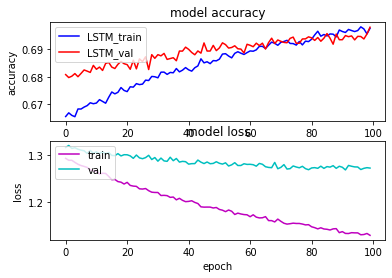

In [38]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [39]:
model.save('/content/drive/MyDrive/datagram/data/partly_trained.h5')

In [ ]:
y_pred_1d = (model.predict(x_test) >= 0.5).astype("int")

In [ ]:
#we can work with chekpoints also
"""# include the epoch in the file name. (use `str.format`)
checkpoint_path = 'training_2/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback =  tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 verbose=1,
                                                 save_weights_only=True,
                                                 period=5) #  save weights everry 5 epochs

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))
model.fit(train_images, train_labels,
         epochs=50, callbacks=[cp_callback],
         validation_data =  (test_images, test_labels),
         verbose=0)"""

In [ ]:
def decode_sentiment(score):
    return np.argmax(score) 


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]
y_pred_1d

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

In [ ]:
cnf_matrix = confusion_matrix(val_data.label.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=val_data.label.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(list(val_data.label), y_pred_1d))

# Single Prediction

In [40]:
def predict(model, review, seq_length = 25):
    
    tokenizer = Tokenizer()
    review = clean_text(review)
    review = Preprocess_list_french(review, dicto='/content/drive/MyDrive/datagram/data/dictionnaire.txt')
    tokenizer.fit_on_texts(review)
    word_index = tokenizer.word_index
    review_padded = pad_sequences(tokenizer.texts_to_sequences(review),
                        maxlen = seq_length)

    
    if(len(review_padded) == 0):
        "Your review must contain at least 1 word!"
        return None
    
    score = model.predict(review_padded)
    y_pred = [np.argmax(score)]
    print('the category is : ' + str(y_pred) )
    
    return y_pred 
review = 'My Eyes - Taille-crayons'
y_pred = predict(model, review, seq_length = 25)

 
La durée de traitement est 0:00:02.278198 s
the category is : [2940]
